##### Cambios:

-Ahora el plan se puede personalizar por estudiante

-Error al calcular la amplitud de horario, retornaba costos mayores

-Error al calcular el costo por disponibilidad de horario, solo contemplaba los días lunes, martes y miércoles al calcular su disponibilidad total y aparte hacía mal el calculo.

In [3]:
import pandas as pd
import numpy as np
import pygad as pg
import time
import requests
import matplotlib.pyplot as plt

# Limpieza y preparación de los datos

## Lectura de datos

In [4]:
d16 = pd.read_csv('./datos/datos_2016.csv')
d17 = pd.read_csv('./datos/datos_2017.csv')
d18 = pd.read_csv('./datos/datos_2018.csv')
d19 = pd.read_csv('./datos/datos_2019.csv')
d2021 = pd.read_csv('./datos/2020_2021.csv')

In [5]:
asignaturas = pd.read_csv('asignaturas2.csv',encoding = 'ISO-8859-1')

In [6]:
plan_2016 = asignaturas.query('plan == "IDP2016"')
plan_2021 = asignaturas.query('plan == "IDP2021"')

In [7]:
oferta = pd.read_csv('oferta_ideio.csv',encoding = 'ISO-8859-1')

In [8]:
seriaciones = pd.read_csv('seriacion.csv')

## Visualización de datos

In [9]:
d16.head()

,Unnamed: 0,carrera,periodo,clave,asignatura,promediofinal,docente,ceveval_global,ceneval_analitico,ceneval_matematico,...,r_modulo8,modulo9,r_modulo9,modulo10,r_modulo10,modulo11,r_modulo11,modulo12,r_modulo12,n_matricula
0,0,Negocios Internacionales,201601,DP0295,Taller de formación en responsabilidad social ...,10.0,Maldonado Saldaña / Gisela,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
1,1,Negocios Internacionales,201601,NI0215,Taller de software para negocios internacionales,9.0,Villeda Cuellar / Víctor Hugo,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
2,2,Negocios Internacionales,201601,LI1104,Nivel 4 Inglés,10.0,Ross / Andrew Patrick Simon,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
3,3,Negocios Internacionales,201601,NI0209,Administración financiera,6.0,Vallejo Filoteo / Jorge,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285
4,4,Negocios Internacionales,201601,NI0213,Transporte y logística en comercio exterior,9.0,Cañedo Magaña / Magdalena del Carmen,1150.0,1108.0,1228.0,...,-,Cálculo,-,Inglés,-,Administración,-,Informática y Computación,-,140311285


In [10]:
d2021.head()

,Unnamed: 0,Column1,programa,periodo,clave,asignatura,docente,promediofinal,ceveval_global,hrs_trabaja,n_matricula
0,0,1,Ingeniería en Datos e Inteligencia Organizacional,202001,IL0414,Taller de argumentación y técnicas de negociación,Torres Pérez / Rubén Juan,7.0,952.0,De 5 a 10 horas,170311163
1,1,2,Ingeniería en Datos e Inteligencia Organizacional,202001,II0422,Taller de emprendedores,Zapata Solís / Zuemy De Lourdes,8.0,1048.0,No trabajaba,180311454
2,2,3,Ingeniería en Datos e Inteligencia Organizacional,202001,DP0498,Problemas de México,Díaz Molina / Libertad Fidelina,9.0,1144.0,De 5 a 10 horas,170311232
3,3,4,Ingeniería en Datos e Inteligencia Organizacional,202001,IT0264,Introducción a los sistemas de información,Olivares González / Oscar,10.0,1072.0,De 11 a 15 horas,190311813
4,4,5,Ingeniería en Datos e Inteligencia Organizacional,202001,II0215,Electricidad y magnetismo,Ramírez Carmona / Leslye Johanna,7.0,1018.0,Más de 20 horas,180311416


In [11]:
asignaturas.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
0,1,II0106,Cálculo diferencial,8,Basica,IAP2019,NaN
1,1,II0209,Cálculo integral,6,Basica,IAP2019,NaN
2,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IAP2019,NaN
3,1,IA0106,Ecología,6,Basica,IAP2019,NaN
4,1,II0102,Física experimental,8,Basica,IAP2019,NaN


In [12]:
plan_2016.head()

,ciclos,clave,nombre,creditos,tipo,plan,preespecialidad
603,1,IT0101,Algoritmos y estructura de datos,6,Basica,IDP2016,NaN
604,1,II0106,Cálculo diferencial,8,Basica,IDP2016,NaN
605,1,II0209,Cálculo integral,6,Basica,IDP2016,NaN
606,1,DP0194,Desarrollo de habilidades del pensamiento,6,Basica,IDP2016,NaN
607,1,ID0101,Diseño de patrones para datos estructurados,6,Basica,IDP2016,NaN


In [13]:
oferta.head()

,ciclo,Trayectoria,Tipo,clave,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes,Sabado
0,1,0,BAS,DP0193,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00,-
1,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,-,-,-,15:00-17:00,17:00-18:00,-
2,1,0,BAS,DP0191,Taller de interacción grupal y competencias co...,Diaz Barriga Cuevas / Claudia,18:00-20:00,-,-,17:00-18:00,-,-
3,1,0,BAS,DP0193,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,18:00-20:00,-,17:00-18:00,-
4,1,0,BAS,DP0194,Desarrollo de habilidades del pensamiento,Mendoza Luna / José Arturo,-,-,19:00-20:00,-,20:00-22:00,-


In [14]:
seriaciones.head()

,plan,ser1,ser2
0,IDP2016,II0106,II0209
1,IDP2016,ID0102,II0215
2,IDP2016,II0209,II0320
3,IDP2016,ID0103,IT0263
4,IDP2016,IT0264,ID0204


## Limpieza de datos

In [15]:
cargas16_19 = pd.concat([d16,d17,d18,d19])
cargas20_21 = d2021

In [16]:
cargas16_19 = cargas16_19.query('carrera == "Ingeniería en Datos e Inteligencia Organizacional"')

In [17]:
cargas16_19 = cargas16_19[['Unnamed: 0', 'carrera', 'periodo', 'clave', 'asignatura',
       'promediofinal', 'docente', 'ceveval_global', 'ceneval_analitico',
       'ceneval_matematico', 'ceneval_lengua', 'ceneval_esp',
       'n_matricula']]

In [18]:
matriculas16 = cargas16_19.query('n_matricula > 160000000 and n_matricula < 170000000')['n_matricula'].unique()
matriculas17 = cargas16_19.query('n_matricula > 170000000 and n_matricula < 180000000')['n_matricula'].unique()
matriculas18 = cargas16_19.query('n_matricula > 180000000 and n_matricula < 190000000')['n_matricula'].unique()
matriculas19 = cargas16_19.query('n_matricula > 190000000 and n_matricula < 200000000')['n_matricula'].unique()
matriculas20 = cargas20_21.query('n_matricula > 200000000 and n_matricula < 210000000')['n_matricula'].unique()
matriculas21 = cargas20_21.query('n_matricula > 210000000 and n_matricula < 220000000')['n_matricula'].unique()

In [19]:
matriculas = np.concatenate((matriculas16, matriculas17,matriculas18,matriculas19,matriculas20,matriculas21))

In [20]:
cargas20_21 = cargas20_21.rename(columns={'programa': 'carrera'})

In [21]:
formato_cargas20_21 = cargas20_21[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]
formato_cargas16_19 = cargas16_19[['carrera', 'periodo', 'clave', 'asignatura','docente','n_matricula','promediofinal']]

formato_cargas = pd.concat([formato_cargas16_19,formato_cargas20_21])

In [22]:
oferta = oferta[['clave','Nombre', 'Maestro', 'Lunes','Martes', 'Miercoles', 'Jueves', 'Viernes']]

In [23]:
oferta = oferta.drop_duplicates()

In [24]:
oferta['Lunes'].unique()

array(['-', '18:00-20:00', '17:00-19:00', '20:00-22:00', '15:00-17:00',
       '9:00-11:00', '19:00-21:00', '19:00-20:00', '7:00-9:00',
       '11:00-13:00', '13:00-14:00', '16:00-18:00', '14:00-16:00',
       '7:00-10:00', '7:00-8:00', '16:00-19:00', '21:00-22:00',
       '16:00-17:00'], dtype=object)

In [25]:
oferta['Martes'].unique()

array(['-', '15:00-17:00', '20:00-21:00', '20:00-22:00', '19:00-20:00',
       '16:00-18:00', '18:00-19:00', '7:00-9:00', '9:00-11:00',
       '18:00-20:00', '14:00-16:00', '13:00-15:00', '8:00-9:00'],
      dtype=object)

In [26]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '\n13:00-15:00', '13:00-15:00', '17:00-19:00',
       '19:00-21:00', '15:00-16:00', '12:00-13:00', '8:00-10:00',
       '7:00-8:00', '10:00-12:00', '16:00-18:00', '14:00-15:00'],
      dtype=object)

In [27]:
oferta['Jueves'].unique()

array(['-', '15:00-17:00', '17:00-18:00', '20:00-21:00', '16:00-17:00',
       '9:00-10:00', '20:00-22:00', '18:00-20:00', '19:00-21:00',
       '7:00-8:00', '13:00-14:00', '8:00-9:00', '9:00-11:00',
       '16:00-18:00', '14:00-15:00', '13:00-15:00', '7:00-9:00',
       '15:00-16:00', '18:00-19:00', '19:00-20:00', '21:00-22:00'],
      dtype=object)

In [28]:
oferta['Viernes'].unique()

array(['16:00-18:00', '17:00-18:00', '-', '20:00-22:00', '15:00-17:00',
       '14:00-15:00', '18:00-20:00', '20:00-21:00', '13:00-14:00',
       '9:00-10:00', '7:00-9:00', '10:00-11:00', '16:00-17:00',
       '14:00-16:00', '18:00-19:00', '8:00-10:00', '19:00-20:00',
       '19:00-21:00'], dtype=object)

In [29]:
oferta.loc[36,'Miercoles'] = '13:00-15:00'

In [30]:
oferta['Miercoles'].unique()

array(['17:00-18:00', '-', '18:00-20:00', '19:00-20:00', '16:00-17:00',
       '15:00-17:00', '20:00-21:00', '20:00-22:00', '18:00-19:00',
       '12:00-14:00', '7:00-9:00', '9:00-11:00', '11:00-12:00',
       '11:00-13:00', '13:00-15:00', '17:00-19:00', '19:00-21:00',
       '15:00-16:00', '12:00-13:00', '8:00-10:00', '7:00-8:00',
       '10:00-12:00', '16:00-18:00', '14:00-15:00'], dtype=object)

In [31]:
def formatoHora(hora):
    if len(hora) == 11:
        return hora
    elif len(hora) == 10:
        return '0' + hora
    elif len(hora) == 9:
        return '0' + hora[0:5] + '0' + hora[5:]
    elif len(hora) == 1:
        return '-'

In [32]:
oferta['Lunes'] = oferta['Lunes'].apply(lambda horas: formatoHora(horas))
oferta['Martes'] = oferta['Martes'].apply(lambda horas: formatoHora(horas))
oferta['Miercoles'] = oferta['Miercoles'].apply(lambda horas: formatoHora(horas))
oferta['Jueves'] = oferta['Jueves'].apply(lambda horas: formatoHora(horas))
oferta['Viernes'] = oferta['Viernes'].apply(lambda horas: formatoHora(horas))

# Definición de funciones útiles

## Función para obtener un Kardex aleatorio

In [33]:
def obtenerKardex(mat = -1):
    if(mat == -1):
        mat = np.random.choice(matriculas)
    return formato_cargas.query('n_matricula == ' + str(mat)).sort_values('periodo')

In [34]:
def obtenerCreditos(kardex):
    claves = kardex.query('promediofinal >= 7')['clave'].unique()
    totalCreditos = 0
    for clave in claves:
        if(clave[0:2] == 'LI' or clave[0:2] == 'TA' or clave[0:2] == 'AD'):
            continue
        totalCreditos += plan.query('clave == "' + clave + '"')['creditos'].values[0]
    return totalCreditos

In [35]:
def obtenerRecomendacionesUnicas(ins,umbral):
    recomendaciones = ins.population[ins.last_generation_fitness >= umbral].copy()
    recomendacionesFinal = []
    for rec in recomendaciones:
        recomendacionesFinal.append(list(set(rec)))
    recomendacionesFinal = list(np.unique(recomendacionesFinal))
    recomendacionesFinal.sort(key=lambda x: -obtenerDesempeno(x,0))

    return recomendacionesFinal

In [298]:
def verKardex():
    print('Matricula: ' + str(kardex.iloc[0]['n_matricula']))
    print('Carrera: ' + str(kardex.iloc[0]['carrera']))
    print('Creditos: ' + str(obtenerCreditos(kardex))+ '\n') 
    periodos = kardex['periodo'].unique()
    for per in periodos:
        print('Periodo: ' + str(per))
        print('Clave\t\tPromedio\tNombre de asignatura')
        materias = kardex.query('periodo == ' + str(per))
        for i in range(len(materias)):
            if(materias.iloc[i]['promediofinal'] < 7):
                print('* ' + materias.iloc[i]['clave'] + '\t' + str(materias.iloc[i]['promediofinal']) + '\t\t' + materias.iloc[i]['asignatura'])
            else:
                print(materias.iloc[i]['clave'] + '\t\t' + str(materias.iloc[i]['promediofinal']) + '\t\t' + materias.iloc[i]['asignatura'])
        print('\n')
    

## Obtención de oferta útil

En este sección se crea la función "obtenerOfertaUtil" la cual filtra la oferta académica para eliminar las materias que no cumplen con la restricción de llevar materias aprobadas y la restricción de llevar materias que no respeten la seriación.

In [36]:
def materiaHaSidoAprobada(kardex,clave):
    if len(kardex.query('clave == "' + clave + '" and promediofinal >= 7')) == 0:
        return False
    else:
        return True

In [37]:
def respetaSeriacion(clave,kardex):
    if len(seriaciones.query('ser2 == "' + clave + '"')) == 0:
        return True
    else:
        #Se guarda en necesarias la lista de asignaturas necesarias para llevar la asignura "clave"
        necesarias = seriaciones.query('ser2 == "' + clave + '"')['ser1'].unique()
        
        #Se recorre la lista para comprobar si el estudiante ya pasó las asignaturas necesarias, en caso de que le falte 
        #al menos una, entonces no se respeta la seriación.
        for necesaria in necesarias:
            if not(materiaHaSidoAprobada(kardex,necesaria)):
                return False
        return True

In [102]:
#Filtra las materias que no cumplen las restricciones 1 y 2

def obtenerOfertaUtil(kardex,oferta):
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    #Se eliminan las materias en la oferta que ya han sido aprobadas
    aprobadas = kardex.query('promediofinal >= 7')['clave'].unique()
    for clave in aprobadas:
        oferta = oferta.query('clave != "' + clave + '"')
        
    #Se eliminan las materias que el alumno no puede llevar por la seriación
    ofertaUtilIndex = set(oferta.index.values)
    for idx in oferta.index:
        if not(respetaSeriacion(oferta.loc[idx]['clave'],kardex)):
            ofertaUtilIndex.remove(idx)
            
    #Se eliminan prácticas profesionales y proyecto terminal
    for i in range(len(oferta['clave'].values)):
        clave = oferta['clave'].values[i]
        if clave[0:3] == 'PID' or clave == 'IT0427':
            try:
                ofertaUtilIndex.remove(oferta.index.values[i])
            except:
                continue
    ofertaUtil = oferta.loc[list(ofertaUtilIndex)]
    
    ofertaUtil = pd.merge(ofertaUtil,plan,how='left',on='clave')[['clave','ciclos','Nombre','Maestro','Lunes','Martes','Miercoles','Jueves','Viernes']]
    
    #Se eliminan materias de elección libre de primer y segundo ciclo
    if(materiaHaSidoAprobada(kardex,'IL0102')):
        ofertaUtil = ofertaUtil.query('clave != "ID0160"')
    if(materiaHaSidoAprobada(kardex,'ID0160')):
        ofertaUtil = ofertaUtil.query('clave != "IL0102"')
    
    if(materiaHaSidoAprobada(kardex,'IT0103')):
        ofertaUtil = ofertaUtil.query('clave != "ID0161"')
    if(materiaHaSidoAprobada(kardex,'ID0161')):
        ofertaUtil = ofertaUtil.query('clave != "IT0103"')
        
    if(materiaHaSidoAprobada(kardex,'ID0264')):
        ofertaUtil = ofertaUtil.query('clave != "ID0262"')
    if(materiaHaSidoAprobada(kardex,'ID0262')):
        ofertaUtil = ofertaUtil.query('clave != "ID0264"')
        
    if(materiaHaSidoAprobada(kardex,'ID0263')):
        ofertaUtil = ofertaUtil.query('clave != "ID0265"')
    if(materiaHaSidoAprobada(kardex,'ID0265')):
        ofertaUtil = ofertaUtil.query('clave != "ID0263"')
        
    #Si la disponibilidad de horario es una restricción, entonces elimina las materias que violen la restricción
    if(disponibilidadComoRestriccion):
        indices = set(ofertaUtil.index)
        indicesUtiles = indices.copy()
        for dia in dias:
            for i in indices:
                if ofertaUtil.loc[i][dia] == '-':
                    continue
                
                horaInicio = int(ofertaUtil.loc[i][dia][0:2])
                horaFin = int(ofertaUtil.loc[i][dia][6:8])
                
                for hora in range(horaInicio,horaFin):
                    if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                        if i in indicesUtiles:
                            indicesUtiles.remove(i)
        indicesUtiles = list(indicesUtiles)
        ofertaUtil = ofertaUtil.loc[indicesUtiles]
    
    return ofertaUtil

## Generación de carga aleatoria válida

En esta sección creamos las funciones "generarCargaValida" la cual retorna una string de bits representando una carga académica con base a la oferta útil. También se crea la función "obtenerDatosCarga" que nos ayuda a obtener los datos de una carga académica con base a la oferta útil y a una string de bits que denominamos "bits de carga"

In [39]:
def generarSolucionAleatoria(ofertaUtil):
    solucion = [-1] * 9
    for i in range(9):
        gen = np.random.randint(-1,len(ofertaUtil))
        if gen == -1:
            solucion[i] = -1
        else:
            solucion[i] = ofertaUtil.index[gen]
    return solucion

In [40]:
def obtenerDatosCarga(solucion,ofertaUtil):
    solucionU = np.array(solucion)
    solucionU = np.unique(solucionU)
    solucionU = solucionU[solucionU >= 0]
    
    return ofertaUtil.loc[solucionU]

In [41]:
def comprobarTraslapacion(solucion,ofertaUtil):
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    
    for dia in dias:
        horarioDia = datosCarga.sort_values(dia)[dia].values
        for i in range(len(horarioDia)):
            if horarioDia[i] == '-':
                continue
            horaInicioI = int(horarioDia[i][0:2])
            horaFinI = int(horarioDia[i][6:8])
            
            for j in range(i+1,len(horarioDia)):
                horaInicioJ = int(horarioDia[j][0:2])
                horaFinJ = int(horarioDia[j][6:8])
                
                if not(horaFinJ  <= horaInicioI or horaInicioJ >= horaFinI):
                    return True
    return False

In [42]:
def esValido(solucion,ofertaUtil):
    #Si se repite una materia es inválido
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    if len(datosCarga['clave'].unique()) < len(datosCarga):
        return False
    #Si se traslapan dos materias es inválido
    if comprobarTraslapacion(solucion,ofertaUtil):
        return False
    #Si son menos de 3 materias es inválido
    solucionSet = set(solucion)
    if -1 in solucionSet:
        solucionSet.remove(-1)
    if(len(solucionSet)<3):
        return False
    
    #Si se llevan dos materias de elección libre del ciclo 1 y 2
    clavesSet = set(datosCarga['clave'])
    
    if 'IL0102' in clavesSet and 'ID0160' in clavesSet:
        return False
    if 'IT0103' in clavesSet and 'ID0161' in clavesSet:
        return False
    if 'ID0264' in clavesSet and 'ID0262' in clavesSet:
        return False
    if 'ID0263' in clavesSet and 'ID0265' in clavesSet:
        return False
    
    return True

In [43]:
def generarSolucionValida(ofertaUtil):
    bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    while not(esValido(bitsDeCarga,ofertaUtil)):
        bitsDeCarga = generarSolucionAleatoria(ofertaUtil)
    
    return bitsDeCarga

In [44]:
def obtenerHorario(carga):
    primeraHoraMinima = 24
    ultimaHoraMaxima = 0
    datosCarga = obtenerDatosCarga(carga,ofertaUtil)
    horario = pd.DataFrame({
        'Hora': ['7:00-8:00','8:00-9:00','9:00-10:00','10:00-11:00','11:00-12:00','12:00-13:00','13:00-14:00','14:00-15:00','15:00-16:00','16:00-17:00','17:00-18:00','18:00-19:00','19:00-20:00','20:00-21:00','21:00-22:00'],
        'Lunes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Martes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Miercoles': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Jueves': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
        'Viernes': ['-','-','-','-','-','-','-','-','-','-','-','-','-','-','-'],
    })
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])
            
            primeraHoraMinima = min(primeraHoraMinima,horaInicio)
            ultimaHoraMaxima = max(ultimaHoraMaxima,horaFin)
            
            nombre = datosCarga.iloc[i]['Nombre']

            for hora in range(horaInicio,horaFin):
                horario.loc[hora-7,dia]=nombre
    return horario[(primeraHoraMinima-7):(ultimaHoraMaxima-6)]

# Definición de funciones de utilidad y de costo

## Utilidad de carga académica con base en cantidad ideal de materias

In [45]:
def UpCM(solucion):
    if(cantidadMateriasIdeal == 0):
        return 1
    
    diferenciaMaxima = max(cantidadMateriasIdeal-3,9-cantidadMateriasIdeal)
    solucionSet = set(solucion)
    
    if -1 in solucionSet:
        solucionSet.remove(-1)
        
    tamanoCarga = len(solucionSet)
    separacion = abs(tamanoCarga-cantidadMateriasIdeal)
    
    return 1 - (separacion / diferenciaMaxima)

## Utilidad de carga académica con base en las materias reprobadas

In [46]:
def obtenerMateriasReprobadas(kardex):
    materiasReprobadas = kardex.query('promediofinal < 7')['clave'].unique()
    materiasReprobadasFinal = []
    for clave in materiasReprobadas:
        aprobado = len(kardex.query('clave == "' + clave + '" and promediofinal >= 7'))
        if aprobado == 0:
            materiasReprobadasFinal.append(clave)
    return materiasReprobadasFinal

In [47]:
def UpMR(kardex,solucion,ofertaUtil):
    materiasReprobadas = obtenerMateriasReprobadas(kardex)
    if len(materiasReprobadas) == 0:
        return 1
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    utilidadTotal = 0
    
    for clave in materiasReprobadas:
        cargado = len(datosCarga.query('clave == "' + clave + '"'))
        if cargado == 1:
            utilidadTotal += 1
            
    
    #Normalización
    utilidad = (utilidadTotal)/(len(materiasReprobadas))
    return utilidad

## Utilidad de carga académica con base en el cierre de ciclos

In [48]:
def UpCC(solucion,ofertaUtil):
    base = 3
    utilidad = [base**3,base**2,base,1]
    utilidadTotal = 0
    
    menorCiclo = min(ofertaUtil['ciclos']) - 1
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    
    claves = datosCarga['clave'].unique()
    for i in range(len(claves)):
        if claves[i][0:2] == 'AD'or claves[i][0:2] == 'TA' or claves[i][0:2] == 'LI' or claves[i][0:2] == 'PI':
            continue
            
        ciclo = int(plan.query('clave == "' + claves[i] + '"')['ciclos']) - 1
        utilidadTotal += utilidad[ciclo - menorCiclo]
    
    utilidadMaxima = 0
    cantidadMateriasCiclo1 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+1))['clave'].unique())
    cantidadMateriasCiclo2 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+2))['clave'].unique())
    cantidadMateriasCiclo3 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+3))['clave'].unique())
    cantidadMateriasCiclo4 = len(ofertaUtil.query('ciclos == ' + str(menorCiclo+4))['clave'].unique())
    cantidadMateriasMaxima = 9
    
    m1 = m2 = m3 = m4 = 0
    
    if (cantidadMateriasMaxima - cantidadMateriasCiclo1) >= 0:
        m1 = cantidadMateriasCiclo1
        cantidadMateriasMaxima -= cantidadMateriasCiclo1
    else:
        m1 = 9
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo2) >= 0:
        m2 = cantidadMateriasCiclo2
        cantidadMateriasMaxima -= cantidadMateriasCiclo2
    elif cantidadMateriasMaxima > 0:
        m2 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo3) >= 0:
        m3 = cantidadMateriasCiclo3
        cantidadMateriasMaxima -= cantidadMateriasCiclo3
    elif cantidadMateriasMaxima > 0:
        m3 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
    if (cantidadMateriasMaxima - cantidadMateriasCiclo4) >= 0:
        m4 = cantidadMateriasCiclo4
        cantidadMateriasMaxima -= cantidadMateriasCiclo4
    elif cantidadMateriasMaxima > 0:
        m4 = cantidadMateriasMaxima
        cantidadMateriasMaxima = 0
        
    
    utilidadMaxima = m1*utilidad[0] + m2*utilidad[1] + m3*utilidad[2] + m4*utilidad[3]
 
    #Normalización
    utilidadNorm = (utilidadTotal)/(utilidadMaxima)
    return utilidadNorm

## Costo por amplitud de horario

In [49]:
def CpAH(solucion):
    amplitudAceptable = 7
    
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    horaMin = 21
    horaMax = 7
    
    for dia in dias:
        for hora in datosCarga[dia]:
            if hora == '-':
                continue
            horaMin = min(int(hora[0:2]),horaMin)
            horaMax = max(int(hora[6:8]),horaMax)
            
    amplitud = (horaMax - horaMin)
    if amplitud <= amplitudAceptable:
        return 0
    amplitud -= amplitudAceptable
    
    return amplitud / (15 - amplitudAceptable)

## Costo de carga académica con base en las horas libres

#### NOTA: Tomar en cuenta las horas libres por día

In [50]:
    def CpHL(solucion,ofertaUtil):
        dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
        costoTotal = 0
        hlMax = 0

        datosCarga = obtenerDatosCarga(solucion,ofertaUtil)

        for dia in dias:
            datosCarga = datosCarga.sort_values(dia)
            if datosCarga[dia].iloc[len(datosCarga)-2] == '-':
                continue

            ultimaHoraFin = 0
            for i in range(len(datosCarga)):
                if datosCarga.iloc[i][dia] == '-':
                    continue
                if ultimaHoraFin == 0:
                    ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
                    primeraHoraDia = int(datosCarga.iloc[i][dia][0:2])
                    continue
                horaInicio = int(datosCarga.iloc[i][dia][0:2])
                costoTotal += (horaInicio - ultimaHoraFin)
                ultimaHoraFin = int(datosCarga.iloc[i][dia][6:8])
            hlMax += (ultimaHoraFin - primeraHoraDia - 2)

        if hlMax == 0:
            return 0
        #Normalización
        costo = (costoTotal)/(hlMax)
        return costo

## Costo de carga académica con base en la disponibilidad de horario del estudiante

Creamos 4 casos diferentes donde los estudiantes trabajan. Guardamos el horario de ocupación de los estudiantes en un dataframe por cada estudiante.

In [51]:
# El estudiante trabaja por las mañanas tiempo completo
disp_est_1 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
})


# El estudiante trabaja por las tardes tiempo completo
disp_est_2 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
})

# El estudiante trabaja por las mañanas medio tiempo
disp_est_3 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Martes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Miercoles": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Jueves": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
    "Viernes": [True,False,False,False,False,False,True,True,True,True,True,True,True,False,False],
})
# El estudiante trabaja por las tardes medio tiempo
disp_est_4 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Martes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,False,False,False,False,False,True,True,True,True,True],
})
disp_est_5 = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Martes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Miercoles": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Jueves": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
    "Viernes": [True,True,True,True,True,True,True,True,True,True,True,True,True,True,True],
})

In [52]:
disponibilidadArr = [disp_est_1,disp_est_2,disp_est_3,disp_est_4,disp_est_5]

In [53]:
def CpDH(solucion,ofertaUtil,disponibilidad):
    disponibilidadTotal = sum(disponibilidad['Lunes']) + sum(disponibilidad['Martes']) + sum(disponibilidad['Miercoles']) + sum(disponibilidad['Jueves']) + sum(disponibilidad['Viernes'])
    if disponibilidadTotal == 75:
        return 0
    
    dias = ['Lunes','Martes','Miercoles','Jueves','Viernes']
    datosCarga = obtenerDatosCarga(solucion,ofertaUtil)
    costoTotal = 0

    for dia in dias:
        for i in range(len(datosCarga)):
            if datosCarga[dia].iloc[i] == '-':
                continue

            horaInicio = int(datosCarga.iloc[i][dia][0:2])
            horaFin = int(datosCarga.iloc[i][dia][6:8])

            for hora in range(horaInicio,horaFin):
                if not(disponibilidad.query('hora == ' + str(hora))[dia].values[0]):
                    costoTotal += 1
                    
    #Normalización
    costo = (costoTotal)/(75 - disponibilidadTotal)
    return costo

# Definición de la función de desempeño

In [54]:
def obtenerDesempeno(solucion,cromosomaIndice):
    if not(esValido(solucion,ofertaUtil)):
        return 0
    
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    upcm = UpCM(solucion)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cpah = CpAH(solucion)
    
    utilidades = {
        "upcc": (upcc * pesos["upcc"]),
        "upmr": (upmr * pesos["upmr"]),
        "upcm": (upcm * pesos["upcm"]),
        "cpdh": pesos["cpdh"] - (cpdh * pesos["cpdh"]),
        "cpah": pesos["cpah"] - (cpah * pesos["cpah"]),
    }
    
    return sum(utilidades.values())

In [55]:
def evaluarSolucion(solucion):
    upcc = UpCC(solucion,ofertaUtil)
    upmr = UpMR(kardex,solucion,ofertaUtil)
    upcm = UpCM(solucion)
    cpdh = CpDH(solucion,ofertaUtil,disponibilidad)
    cpah = CpAH(solucion)
    
    print("La carga evaluada tiene:")
    print("\t" + str(round(100*upcc,2)) + "% de utilidad por las materias de primeros ciclos llevadas.")
    print("\t" + str(round(100*upmr,2)) + "% del total de las materias reprobadas del estudiante.") 
    print("\t" + str(round(100*upcm,2)) + "% de utilidad por cantidad ideal de materias del estudiante.") 
    print("\t" + str(round(100*cpdh,2)) + "% de costo por sobreposición con las horas donde el estudiante no está disponible.")
    print("\t" + str(round(100*cpah,2)) + "% de costo por el total de amplitud de horario.")

In [56]:
def on_generation(ga_instance):
    print("Generación: " + str(ga_instance.generations_completed))

# Algoritmos evolutivos

In [354]:
instancia1.last_generation_parents

array([[14, 15, 18, 15, 19, 30, 16, 38, 30],
       [14, 15, 18, 30, 19, 30, 16,  3, 30]])

In [356]:
ofertaUtil.index

Int64Index([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
            37, 38],
           dtype='int64')

## Eddie ( 2do semestre)

In [331]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1.5,  #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [338]:
disponibilidadComoRestriccion = False
disponibilidad = disponibilidadArr[4] #Disponibilidad completa de horario
plan = plan_2016

kardex = obtenerKardex(190311499).query('periodo < 202201')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 7

IL0204


In [333]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))


Creditos: 240


In [334]:
instancia1 = pg.GA(num_generations=50,
                   stop_criteria="saturate_10",
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Proceso terminado en 93.47297263145447


In [341]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
14,ID0307,3,Ingeniería de software,Aguas García / Nancy,-,16:00-18:00,-,16:00-17:00,-
15,ID0310,3,Minería de datos,Gómez García / Hector Fernando,-,-,16:00-18:00,-,16:00-18:00
16,ID3422,3,Negocios digitales,Rodríguez Santiago / Juan Manuel,-,18:00-20:00,-,18:00-19:00,-
18,II0422,4,Taller de emprendedores,García Rivera / Miriam Angelica,16:00-18:00,-,-,17:00-18:00,-
19,IT0263,3,Electrónica analógica,Márquez Chacón / Wilberth,-,-,18:00-20:00,-,18:00-19:00
30,DP0498,3,Problemas de México,Díaz Molina / Libertad Fidelina,-,14:00-16:00,-,15:00-16:00,-
38,DP0499,4,Seminario de investigación,Reyes Miranda / José Felipe,14:00-16:00,-,14:00-15:00,-,-


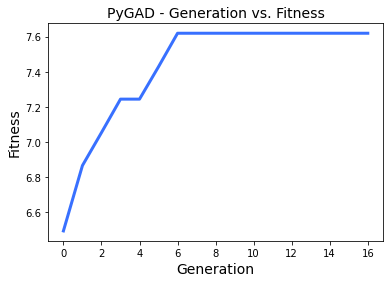

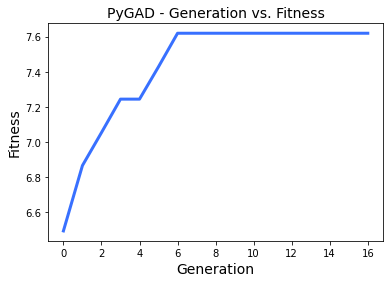

In [342]:
instancia1.plot_fitness()

In [343]:
evaluarSolucion(solution)

La carga evaluada tiene:
	80.95% de utilidad por las materias de primeros ciclos llevadas.
	100% del total de las materias reprobadas del estudiante.
	100.0% de utilidad por cantidad ideal de materias del estudiante.
	0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	0% de costo por el total de amplitud de horario.


In [348]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
14,ID0307,3,Ingeniería de software,Aguas García / Nancy,-,16:00-18:00,-,16:00-17:00,-
15,ID0310,3,Minería de datos,Gómez García / Hector Fernando,-,-,16:00-18:00,-,16:00-18:00
16,ID3422,3,Negocios digitales,Rodríguez Santiago / Juan Manuel,-,18:00-20:00,-,18:00-19:00,-
18,II0422,4,Taller de emprendedores,García Rivera / Miriam Angelica,16:00-18:00,-,-,17:00-18:00,-
19,IT0263,3,Electrónica analógica,Márquez Chacón / Wilberth,-,-,18:00-20:00,-,18:00-19:00
30,DP0498,3,Problemas de México,Díaz Molina / Libertad Fidelina,-,14:00-16:00,-,15:00-16:00,-
38,DP0499,4,Seminario de investigación,Reyes Miranda / José Felipe,14:00-16:00,-,14:00-15:00,-,-


In [344]:
instancia1.best_solution_generation

6

In [345]:
solution_fitness

7.619047619047619

In [340]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
7,14:00-15:00,Seminario de investigación,Problemas de México,Seminario de investigación,-,-
8,15:00-16:00,Seminario de investigación,Problemas de México,-,Problemas de México,-
9,16:00-17:00,Taller de emprendedores,Ingeniería de software,Minería de datos,Ingeniería de software,Minería de datos
10,17:00-18:00,Taller de emprendedores,Ingeniería de software,Minería de datos,Taller de emprendedores,Minería de datos
11,18:00-19:00,-,Negocios digitales,Electrónica analógica,Negocios digitales,Electrónica analógica
12,19:00-20:00,-,Negocios digitales,Electrónica analógica,-,-
13,20:00-21:00,-,-,-,-,-


**Resultado:** El algoritmo me recomendó un horario "mejor" debido a que toma todas las materias recomendadas del ciclo correspondiente y en un mismo turno. Sin embargo tiene la ventaja de llevar más materias lo que permite adelantar con los créditos para la licenciatura.

## Dylan

### Prueba 1

In [87]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [86]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [False,False,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [False,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [False,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [False,True,True,True,True,False,False,False,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CHAN_DYLAN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [66]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

IT0208 Electrónica digital
IT0425 Introducción a la inteligencia artificial

Creditos: 214


In [67]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Proceso terminado en 747.7861475944519


In [68]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
1,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
9,II0215,2,Electricidad y magnetismo,Casas De La Cruz / Rosa Guadalupe,11:00-13:00,-,-,13:00-15:00,-
22,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-


In [72]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
2,9:00-10:00,Bases de Datos,-,Bases de Datos,Geometría computacional,-
3,10:00-11:00,Bases de Datos,-,Bases de Datos,Geometría computacional,Geometría computacional
4,11:00-12:00,Electricidad y magnetismo,-,-,-,-
5,12:00-13:00,Electricidad y magnetismo,-,-,-,-
6,13:00-14:00,-,-,-,Electricidad y magnetismo,-
7,14:00-15:00,Introducción a la inteligencia artificial,-,Introducción a la inteligencia artificial,Electricidad y magnetismo,-
8,15:00-16:00,Introducción a la inteligencia artificial,-,-,-,-
9,16:00-17:00,-,-,-,-,-


In [69]:
evaluarSolucion(solution)

La carga evaluada tiene:
	58.82% de utilidad por las materias de primeros ciclos llevadas.
	50.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	4.44% de costo por sobreposición con las horas donde el estudiante no está disponible.
	0% de costo por el total de amplitud de horario.


In [71]:
solution_fitness

6.065359477124183

In [173]:
evaluarSolucion([0,1,3,22,13])

La carga evaluada tiene:
	64.71% de utilidad por las materias de primeros ciclos llevadas.
	50.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	6.67% de costo por sobreposición con las horas donde el estudiante no está disponible.
	25.0% de costo por el total de amplitud de horario.


In [82]:
ofertaUtil.loc[[0,1,3,22,13]]

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
1,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
3,IL0204,2,Estadística analítica,Cruz Pichardo / Felisa,07:00-09:00,-,07:00-09:00,-,-
22,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
13,ID0307,3,Ingeniería de software,Morales Saavedra / Emmanuel,11:00-13:00,-,12:00-13:00,-,-


### Prueba 2

In [156]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 0.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [157]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [False,False,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [False,True,True,True,True,True,False,False,False,False,False,False,False,False,False],
    "Jueves": [False,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [False,True,True,True,True,False,False,False,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CHAN_DYLAN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [158]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

IT0208 Electrónica digital
IT0425 Introducción a la inteligencia artificial

Creditos: 214


In [159]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Proceso terminado en 598.9081280231476


In [160]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
1,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
9,II0215,2,Electricidad y magnetismo,Casas De La Cruz / Rosa Guadalupe,11:00-13:00,-,-,13:00-15:00,-
11,IL0204,2,Estadística analítica,Virgen Suárez / Jarmen Said,-,07:00-09:00,-,07:00-09:00,-
22,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
23,IT0317,4,Diseño de interfaces humano-máquina,Morales Saavedra / Emmanuel,-,-,15:00-16:00,-,14:00-16:00
24,ID3424,4,Visualización de datos,Mendiola Fuentes / Jessica Carmin,07:00-08:00,-,-,-,07:00-09:00


In [161]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,Visualización de datos,Estadística analítica,-,Estadística analítica,Visualización de datos
1,8:00-9:00,-,Estadística analítica,-,Estadística analítica,Visualización de datos
2,9:00-10:00,Bases de Datos,-,Bases de Datos,Geometría computacional,-
3,10:00-11:00,Bases de Datos,-,Bases de Datos,Geometría computacional,Geometría computacional
4,11:00-12:00,Electricidad y magnetismo,-,-,-,-
5,12:00-13:00,Electricidad y magnetismo,-,-,-,-
6,13:00-14:00,-,-,-,Electricidad y magnetismo,-
7,14:00-15:00,Introducción a la inteligencia artificial,-,Introducción a la inteligencia artificial,Electricidad y magnetismo,Diseño de interfaces humano-máquina
8,15:00-16:00,Introducción a la inteligencia artificial,-,Diseño de interfaces humano-máquina,-,Diseño de interfaces humano-máquina
9,16:00-17:00,-,-,-,-,-


In [162]:
evaluarSolucion(solution)

La carga evaluada tiene:
	80.39% de utilidad por las materias de primeros ciclos llevadas.
	50.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	20.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	25.0% de costo por el total de amplitud de horario.


In [163]:
solution_fitness

4.257843137254902

In [164]:
evaluarSolucion([0,1,3,22,13])

La carga evaluada tiene:
	64.71% de utilidad por las materias de primeros ciclos llevadas.
	50.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	6.67% de costo por sobreposición con las horas donde el estudiante no está disponible.
	25.0% de costo por el total de amplitud de horario.


In [165]:
obtenerDesempeno([0,1,3,22,13],0)

4.01078431372549

In [166]:
ofertaUtil.loc[[0,1,3,22,13]]

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0204,2,Bases de Datos,Lara Peraza / Wilberth Eduardo,09:00-11:00,-,09:00-11:00,-,-
1,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
3,IL0204,2,Estadística analítica,Cruz Pichardo / Felisa,07:00-09:00,-,07:00-09:00,-,-
22,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
13,ID0307,3,Ingeniería de software,Morales Saavedra / Emmanuel,11:00-13:00,-,12:00-13:00,-,-


In [167]:
obtenerHorario([0,1,3,22,13])

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,Estadística analítica,-,Estadística analítica,-,-
1,8:00-9:00,Estadística analítica,-,Estadística analítica,-,-
2,9:00-10:00,Bases de Datos,-,Bases de Datos,Geometría computacional,-
3,10:00-11:00,Bases de Datos,-,Bases de Datos,Geometría computacional,Geometría computacional
4,11:00-12:00,Ingeniería de software,-,-,-,-
5,12:00-13:00,Ingeniería de software,-,Ingeniería de software,-,-
6,13:00-14:00,-,-,-,-,-
7,14:00-15:00,Introducción a la inteligencia artificial,-,Introducción a la inteligencia artificial,-,-
8,15:00-16:00,Introducción a la inteligencia artificial,-,-,-,-
9,16:00-17:00,-,-,-,-,-


**Resultados:** Las materias son pocas por el horario de disponibilidad especificado, sin embargo al disminuir su peso la cantidad de materias aumenta así como el desempeño de la carga.

## Jasmin

In [176]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [177]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Martes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Miercoles": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Jueves": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True],
    "Viernes": [False,False,False,False,False,False,False,False,False,True,True,True,True,True,True]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/CANDANEDO_JASMIN_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [178]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

ID0205 Geometría computacional

Creditos: 278


In [179]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Proceso terminado en 620.6776096820831


### Resultados

In [180]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
4,ID0205,2,Geometría computacional,Naredo García / Enrique,-,14:00-16:00,-,14:00-15:00,-
8,ID0310,3,Minería de datos,Gómez García / Hector Fernando,-,-,16:00-18:00,-,16:00-18:00
9,ID3422,3,Negocios digitales,Rodríguez Santiago / Juan Manuel,-,18:00-20:00,-,18:00-19:00,-
11,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
16,IL0414,4,Taller de argumentación y técnicas de negociación,Contreras Macossay / Bani Obed,19:00-20:00,-,20:00-22:00,-,-
19,ID3420,4,Analítica para la inteligencia de negocios,Gómez García / Hector Fernando,-,-,18:00-20:00,-,18:00-19:00
20,ID3423,4,Sistemas de apoyo para la toma de decisiones,Mendiola Fuentes / Jessica Carmin,-,16:00-18:00,-,17:00-18:00,-
22,IT3472,4,Principios de automatización y robótica,Landaverde Lorenzo / Pablo Jacob,-,20:00-22:00,-,21:00-22:00,-
23,NI3431,4,Marketing en los negocios electrónicos,Canche Dzul / Arely Del Socorro,21:00-22:00,-,-,-,19:00-21:00


In [196]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
7,14:00-15:00,Introducción a la inteligencia artificial,Geometría computacional,Introducción a la inteligencia artificial,Geometría computacional,-
8,15:00-16:00,Introducción a la inteligencia artificial,Geometría computacional,-,-,-
9,16:00-17:00,-,Sistemas de apoyo para la toma de decisiones,Minería de datos,-,Minería de datos
10,17:00-18:00,-,Sistemas de apoyo para la toma de decisiones,Minería de datos,Sistemas de apoyo para la toma de decisiones,Minería de datos
11,18:00-19:00,-,Negocios digitales,Analítica para la inteligencia de negocios,Negocios digitales,Analítica para la inteligencia de negocios
12,19:00-20:00,Taller de argumentación y técnicas de negociación,Negocios digitales,Analítica para la inteligencia de negocios,-,Marketing en los negocios electrónicos
13,20:00-21:00,-,Principios de automatización y robótica,Taller de argumentación y técnicas de negociación,-,Marketing en los negocios electrónicos
14,21:00-22:00,Marketing en los negocios electrónicos,Principios de automatización y robótica,Taller de argumentación y técnicas de negociación,Principios de automatización y robótica,-


In [187]:
evaluarSolucion(solution)

La carga evaluada tiene:
	92.0% de utilidad por las materias de primeros ciclos llevadas.
	100.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	13.33% de costo por sobreposición con las horas donde el estudiante no está disponible.
	12.5% de costo por el total de amplitud de horario.


In [183]:
solution_fitness

6.881666666666666

### Resultados ideales

In [200]:
obtenerDesempeno([ 4, 20, 22,  8,  9, 23, 16, 11, 18],0)

6.881666666666666

In [190]:
solucionIdeal = [0,13,11,17,18,21,22,20,23]

In [195]:
obtenerDatosCarga(solucionIdeal,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
11,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
13,ID0309,3,Aprendizaje estadístico,Arzápalo Treviño / Ángel Alejandro,-,09:00-11:00,-,07:00-08:00,-
17,ID0414,4,Seguridad de datos,Aguilar Pérez / Jairo Cesar,-,18:00-20:00,-,18:00-20:00,-
18,ID3415,4,Cómputo ubicuo,Sansores Pérez / Candelaria Elizabeth,-,-,18:00-20:00,-,18:00-19:00
20,ID3423,4,Sistemas de apoyo para la toma de decisiones,Mendiola Fuentes / Jessica Carmin,-,16:00-18:00,-,17:00-18:00,-
21,IT0423,4,Administración de proyectos de desarrollo de s...,Galvan Herrera / Maria Fernanda,19:00-21:00,-,-,20:00-21:00,-
22,IT3472,4,Principios de automatización y robótica,Landaverde Lorenzo / Pablo Jacob,-,20:00-22:00,-,21:00-22:00,-
23,NI3431,4,Marketing en los negocios electrónicos,Canche Dzul / Arely Del Socorro,21:00-22:00,-,-,-,19:00-21:00


In [191]:
evaluarSolucion(solucionIdeal)

La carga evaluada tiene:
	84.0% de utilidad por las materias de primeros ciclos llevadas.
	100.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	20.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	100.0% de costo por el total de amplitud de horario.


In [192]:
obtenerDesempeno(solucionIdeal,0)

5.68

In [193]:
obtenerHorario(solucionIdeal)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,-,-,-,Aprendizaje estadístico,-
1,8:00-9:00,-,-,-,-,-
2,9:00-10:00,-,Aprendizaje estadístico,-,Geometría computacional,-
3,10:00-11:00,-,Aprendizaje estadístico,-,Geometría computacional,Geometría computacional
4,11:00-12:00,-,-,-,-,-
5,12:00-13:00,-,-,-,-,-
6,13:00-14:00,-,-,-,-,-
7,14:00-15:00,Introducción a la inteligencia artificial,-,Introducción a la inteligencia artificial,-,-
8,15:00-16:00,Introducción a la inteligencia artificial,-,-,-,-
9,16:00-17:00,-,Sistemas de apoyo para la toma de decisiones,-,-,-


**Resultados:** La diferencia principal entre la elección del estudiante y la carga recomendada es la concentración de las materias en un solo horario. Una materia de preespecialidad hace falta pero se puede susituir fácilmente y tendría el mismo desempeño

## Valeria

In [62]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2.5,  #Costo por disponibilidad de horario
    "cpah": 1,    #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

In [63]:
disponibilidadComoRestriccion = False
disponibilidad = pd.DataFrame({
    "hora": [7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
    "Lunes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Martes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Miercoles": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Jueves": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False],
    "Viernes": [True,True,True,True,True,True,True,True,False,False,False,False,False,False,False]
})
plan = plan_2016

kardex = pd.read_csv('./Kardex/GUZMAN_VALERIA_KARDEX.csv')
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [64]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

ID0205 Geometría computacional
ID0309 Aprendizaje estadístico

Creditos: 228


In [65]:
instancia1 = pg.GA(num_generations=20,
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Proceso terminado en 1274.0753066539764


### Resultados

In [66]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
5,ID0205,2,Geometría computacional,Naredo García / Enrique,-,14:00-16:00,-,14:00-15:00,-
9,ID0310,3,Minería de datos,Gómez García / Hector Fernando,-,-,08:00-10:00,-,08:00-10:00
10,ID3416,3,Diseño multimedia,Landeros Alvarado / Aurea,-,08:00-09:00,-,09:00-11:00,-
11,ID3468,4,Herramientas para la gestión de grandes volúme...,Mendiola Fuentes / Jessica Carmin,09:00-11:00,-,-,13:00-14:00,-
12,II0422,4,Taller de emprendedores,Treviño Arzápalo / Ángel Alejandro,07:00-09:00,-,07:00-08:00,-,-
13,IT0263,3,Electrónica analógica,Casas De La Cruz / Rosa Guadalupe,13:00-14:00,-,10:00-12:00,-,-
19,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
21,ID0309,3,Aprendizaje estadístico,Arzápalo Treviño / Ángel Alejandro,-,09:00-11:00,-,07:00-08:00,-


In [67]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,Taller de emprendedores,-,Taller de emprendedores,Aprendizaje estadístico,-
1,8:00-9:00,Taller de emprendedores,Diseño multimedia,Minería de datos,-,Minería de datos
2,9:00-10:00,Herramientas para la gestión de grandes volúme...,Aprendizaje estadístico,Minería de datos,Diseño multimedia,Minería de datos
3,10:00-11:00,Herramientas para la gestión de grandes volúme...,Aprendizaje estadístico,Electrónica analógica,Diseño multimedia,-
4,11:00-12:00,-,-,Electrónica analógica,-,-
5,12:00-13:00,-,-,-,-,-
6,13:00-14:00,Electrónica analógica,-,-,Herramientas para la gestión de grandes volúme...,-
7,14:00-15:00,Introducción a la inteligencia artificial,Geometría computacional,Introducción a la inteligencia artificial,Geometría computacional,-
8,15:00-16:00,Introducción a la inteligencia artificial,Geometría computacional,-,-,-
9,16:00-17:00,-,-,-,-,-


In [68]:
evaluarSolucion(solution)

La carga evaluada tiene:
	89.66% de utilidad por las materias de primeros ciclos llevadas.
	100.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	5.71% de costo por sobreposición con las horas donde el estudiante no está disponible.
	25.0% de costo por el total de amplitud de horario.


In [69]:
solution_fitness

6.900246305418719

### Resultados ideales

In [200]:
obtenerDesempeno([ 4, 20, 22,  8,  9, 23, 16, 11, 18],0)

6.881666666666666

In [190]:
solucionIdeal = [0,13,11,17,18,21,22,20,23]

In [195]:
obtenerDatosCarga(solucionIdeal,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,ID0205,2,Geometría computacional,Naredo García / Enrique,-,-,-,09:00-11:00,10:00-11:00
11,IT0425,3,Introducción a la inteligencia artificial,Sansores Pérez / Candelaria Elizabeth,14:00-16:00,-,14:00-15:00,-,-
13,ID0309,3,Aprendizaje estadístico,Arzápalo Treviño / Ángel Alejandro,-,09:00-11:00,-,07:00-08:00,-
17,ID0414,4,Seguridad de datos,Aguilar Pérez / Jairo Cesar,-,18:00-20:00,-,18:00-20:00,-
18,ID3415,4,Cómputo ubicuo,Sansores Pérez / Candelaria Elizabeth,-,-,18:00-20:00,-,18:00-19:00
20,ID3423,4,Sistemas de apoyo para la toma de decisiones,Mendiola Fuentes / Jessica Carmin,-,16:00-18:00,-,17:00-18:00,-
21,IT0423,4,Administración de proyectos de desarrollo de s...,Galvan Herrera / Maria Fernanda,19:00-21:00,-,-,20:00-21:00,-
22,IT3472,4,Principios de automatización y robótica,Landaverde Lorenzo / Pablo Jacob,-,20:00-22:00,-,21:00-22:00,-
23,NI3431,4,Marketing en los negocios electrónicos,Canche Dzul / Arely Del Socorro,21:00-22:00,-,-,-,19:00-21:00


In [191]:
evaluarSolucion(solucionIdeal)

La carga evaluada tiene:
	84.0% de utilidad por las materias de primeros ciclos llevadas.
	100.0% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	20.0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	100.0% de costo por el total de amplitud de horario.


In [192]:
obtenerDesempeno(solucionIdeal,0)

5.68

In [193]:
obtenerHorario(solucionIdeal)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
0,7:00-8:00,-,-,-,Aprendizaje estadístico,-
1,8:00-9:00,-,-,-,-,-
2,9:00-10:00,-,Aprendizaje estadístico,-,Geometría computacional,-
3,10:00-11:00,-,Aprendizaje estadístico,-,Geometría computacional,Geometría computacional
4,11:00-12:00,-,-,-,-,-
5,12:00-13:00,-,-,-,-,-
6,13:00-14:00,-,-,-,-,-
7,14:00-15:00,Introducción a la inteligencia artificial,-,Introducción a la inteligencia artificial,-,-
8,15:00-16:00,Introducción a la inteligencia artificial,-,-,-,-
9,16:00-17:00,-,Sistemas de apoyo para la toma de decisiones,-,-,-


**Resultados:** La diferencia principal entre la elección del estudiante y la carga recomendada es la concentración de las materias en un solo horario. Una materia de preespecialidad hace falta pero se puede susituir fácilmente y tendría el mismo desempeño

## Prueba

In [319]:
pesos = {
    "upcc": 2,    #Utilidad por cerrar ciclos
    "upmr": 1,    #Utilidad por materias reprobadas
    "upcm": 1,    #Utilidad por cantidad ideal de materias
    "cpdh": 2,  #Costo por disponibilidad de horario
    "cpah": 1.5,  #Costo por amplitud de horario
    "cphl": 1     #Costo por horas libres (no se está utilizando actualmente)
}

disponibilidadComoRestriccion = False
disponibilidad = disponibilidadArr[4] #Disponibilidad completa de horario
plan = plan_2016

kardex = obtenerKardex()
ofertaUtil = obtenerOfertaUtil(kardex,oferta)
cantidadMateriasIdeal = 0

In [320]:
verKardex()

Matricula: 170311514
Carrera: Ingeniería en Datos e Inteligencia Organizacional
Creditos: 148

Periodo: 201703
Clave		Promedio	Nombre de asignatura
* ID0102	0.0		Física clásica
* IT0101	0.0		Algoritmos y estructura de datos
* DP0194	5.0		Desarrollo de habilidades del pensamiento
* DP0191	0.0		Taller de interacción grupal y competencias comunicativas
ID0160		8.0		Pensamiento crítico para ingeniería
LI1101		10.0		Nivel 1 Inglés
* IT0161	3.0		Sistemas operativos POSIX


Periodo: 201801
Clave		Promedio	Nombre de asignatura
IT0101		9.0		Algoritmos y estructura de datos
LI1102		10.0		Nivel 2 Inglés
IT0161		8.0		Sistemas operativos POSIX


Periodo: 201803
Clave		Promedio	Nombre de asignatura
* ID0102	2.0		Física clásica
DP0191		9.0		Taller de interacción grupal y competencias comunicativas
DP0194		8.0		Desarrollo de habilidades del pensamiento
LI1103		10.0		Nivel 3 Inglés


Periodo: 201901
Clave		Promedio	Nombre de asignatura
ID0206		9.0		Interconectividad en redes
ID0204		9.0		Bases de Datos

In [322]:
for clave in obtenerMateriasReprobadas(kardex):
    print(clave,plan.query('clave == "' + clave + '"')['nombre'].values[0])
print('\nCreditos: ' + str(obtenerCreditos(kardex)))

IT0210 Programación orientada a objetos
II0215 Electricidad y magnetismo
DP0193 Taller de redacción profesional
ID0265 Programación web
ID0414 Seguridad de datos
ID0308 Análisis de grandes volúmenes de datos

Creditos: 148


In [323]:
ofertaUtil.sort_values('ciclos')

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,DP0193,1,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00
1,DP0193,1,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,18:00-20:00,-,17:00-18:00
2,II0209,1,Cálculo integral,Canul Chalé / Juan Diego,17:00-19:00,-,16:00-17:00,-,-
3,DP0193,1,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,-,17:00-18:00,18:00-20:00
4,DP0193,1,Taller de redacción profesional,Caamal Lora / Gabriel Adoni,-,20:00-21:00,-,-,20:00-22:00
5,DP0193,1,Taller de redacción profesional,Caamal Lora / Gabriel Adoni,20:00-22:00,-,20:00-21:00,-,-
7,II0209,1,Cálculo integral,Zavala Amezcua / Eva Mirelle,09:00-11:00,-,-,09:00-10:00,-
8,DP0193,1,Taller de redacción profesional,Parra Dorantes / Roberto,-,-,09:00-11:00,-,09:00-10:00
9,DP0193,1,Taller de redacción profesional,Vargas Hernández / Argentina,07:00-09:00,-,-,07:00-08:00,-
17,II0215,2,Electricidad y magnetismo,Casas De La Cruz / Rosa Guadalupe,14:00-16:00,-,-,16:00-18:00,-


In [324]:
instancia1 = pg.GA(num_generations=50,
                   stop_criteria="saturate_10",
                   num_parents_mating=2,
                   fitness_func=obtenerDesempeno,
                   sol_per_pop=500,
                   num_genes=9,
                   parent_selection_type="sss",
                   keep_parents=1,
                   crossover_type='uniform',
                   mutation_type='random',
                   mutation_percent_genes=15,
                   gene_type=int,
                   gene_space=np.append(ofertaUtil.index.values,[-1]),
                   on_generation=on_generation)
start_time = time.time()
instancia1.run()
tiempoejecucion = time.time() - start_time
print('Proceso terminado en ' + str(tiempoejecucion))
solution, solution_fitness, solution_idx = instancia1.best_solution()

Generación: 1
Generación: 2
Generación: 3
Generación: 4
Generación: 5
Generación: 6
Generación: 7
Generación: 8
Generación: 9
Generación: 10
Generación: 11
Generación: 12
Generación: 13
Generación: 14
Generación: 15
Generación: 16
Generación: 17
Generación: 18
Generación: 19
Generación: 20
Generación: 21
Generación: 22
Generación: 23
Generación: 24
Generación: 25
Generación: 26
Generación: 27
Generación: 28
Generación: 29
Generación: 30
Proceso terminado en 674.4468367099762


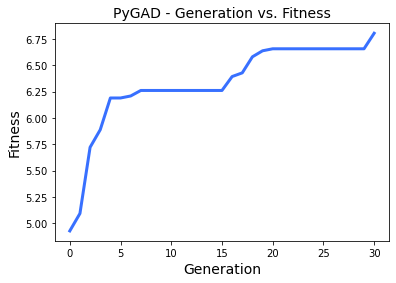

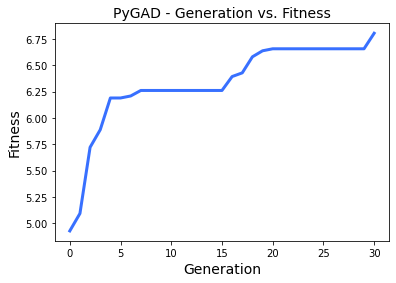

In [325]:
instancia1.plot_fitness()

In [326]:
solution_fitness

6.804761904761905

In [327]:
evaluarSolucion(solution)

La carga evaluada tiene:
	81.9% de utilidad por las materias de primeros ciclos llevadas.
	66.67% del total de las materias reprobadas del estudiante.
	100% de utilidad por cantidad ideal de materias del estudiante.
	0% de costo por sobreposición con las horas donde el estudiante no está disponible.
	0% de costo por el total de amplitud de horario.


In [328]:
obtenerDatosCarga(solution,ofertaUtil)

,clave,ciclos,Nombre,Maestro,Lunes,Martes,Miercoles,Jueves,Viernes
0,DP0193,1,Taller de redacción profesional,Alvarado Martínez / María Del Carmen,-,-,17:00-18:00,-,16:00-18:00
2,II0209,1,Cálculo integral,Canul Chalé / Juan Diego,17:00-19:00,-,16:00-17:00,-,-
12,ID0265,2,Programación web,Morales Saavedra / Emmanuel,13:00-14:00,-,13:00-15:00,-,-
15,ID0205,2,Geometría computacional,Naredo García / Enrique,-,14:00-16:00,-,14:00-15:00,-
17,II0215,2,Electricidad y magnetismo,Casas De La Cruz / Rosa Guadalupe,14:00-16:00,-,-,16:00-18:00,-
29,IT0263,3,Electrónica analógica,Márquez Chacón / Wilberth,-,-,18:00-20:00,-,18:00-19:00
32,IT0317,4,Diseño de interfaces humano-máquina,Morales Saavedra / Emmanuel,-,-,15:00-16:00,-,14:00-16:00
40,ID0414,4,Seguridad de datos,Aguilar Pérez / Jairo Cesar,-,18:00-20:00,-,18:00-20:00,-


In [329]:
obtenerHorario(solution)

,Hora,Lunes,Martes,Miercoles,Jueves,Viernes
6,13:00-14:00,Programación web,-,Programación web,-,-
7,14:00-15:00,Electricidad y magnetismo,Geometría computacional,Programación web,Geometría computacional,Diseño de interfaces humano-máquina
8,15:00-16:00,Electricidad y magnetismo,Geometría computacional,Diseño de interfaces humano-máquina,-,Diseño de interfaces humano-máquina
9,16:00-17:00,-,-,Cálculo integral,Electricidad y magnetismo,Taller de redacción profesional
10,17:00-18:00,Cálculo integral,-,Taller de redacción profesional,Electricidad y magnetismo,Taller de redacción profesional
11,18:00-19:00,Cálculo integral,Seguridad de datos,Electrónica analógica,Seguridad de datos,Electrónica analógica
12,19:00-20:00,-,Seguridad de datos,Electrónica analógica,Seguridad de datos,-
13,20:00-21:00,-,-,-,-,-
